<a href="https://colab.research.google.com/github/zdwhite/Thinkful-Unit-2/blob/master/Thinkful_prep_dataset_for_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U seaborn

#restart runtime to get upgraded seaborn graphs

    100% |████████████████████████████████| 215kB 26.0MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy

from sklearn.decomposition import PCA
from sklearn import datasets

In [3]:
from google.colab import drive
drive.mount

<function google.colab.drive.mount>

In [0]:
df = pd.read_csv('dota2 heroes.csv')



1.  Select an outcome variable
2.  Pick four variables (one to two categorical, three to four continuous) for features
3.  Explore the variables using the univariate and bivariate methods
4.  Create ten new features and explain
5.  Filtering methods to select the five best features



In [5]:
df.head()

,HERO,A,STR,STR+,STR 25,AGI,AGI+,AGI 25,INT,INT+,...,VS-D,VS-N,TR,COL,HP/S,L,Pick rate,Win rate,KDA Ratio4,Match Duration4
0,Abaddon,str,23,2.6,85.4,17,1.5,53.0,21,2.0,...,1800,800,0.5,24,1.50,2,0.027,0.524,2.86,38.583333
1,Alchemist,str,25,2.1,75.4,16,1.2,44.8,25,1.8,...,1800,800,0.6,24,1.50,2,0.064,0.523,3.03,38.016667
2,Ancient Apparition,int,20,1.7,60.8,20,2.2,72.8,23,2.6,...,1800,800,0.6,24,1.50,2,0.069,0.519,2.77,40.750000
3,Anti-Mage,agl,23,1.3,54.2,22,2.8,89.2,12,1.8,...,1800,800,0.5,24,1.75,2,0.124,0.553,3.09,38.483333
4,Arc Warden,agl,25,3.0,97.0,15,1.8,58.2,24,2.6,...,1800,800,0.6,24,1.75,2,0.056,0.506,3.19,40.416667


In [6]:
df.columns

Index(['HERO', 'A', 'STR', 'STR+', 'STR 25', 'AGI', 'AGI+', 'AGI 25', 'INT',
       'INT+', 'INT 25', 'T', 'T+', 'T25', 'MS', 'AR', 'DMG (MIN)',
       'DMG (MAX)', 'RG', 'BAT', 'ATK PT', 'ATK BS', 'VS-D', 'VS-N', 'TR',
       'COL', 'HP/S', 'L', 'Pick rate', 'Win rate', 'KDA Ratio4',
       'Match Duration4'],
      dtype='object')

In [0]:
#For this Exercize we'll compare 'Strength' based heroes against 'Agility' based heroes
# This is to say the heroes primary stat is either STR or AGI

df_compare=df.loc[((df['A'])=='str')|(df['A']=='agl')]

df_compare = df_compare.loc[:, df_compare.columns != 'A']
df_compare = df_compare.loc[:, df_compare.columns != 'HERO']

In [8]:
df_compare.head()

,STR,STR+,STR 25,AGI,AGI+,AGI 25,INT,INT+,INT 25,T,...,VS-D,VS-N,TR,COL,HP/S,L,Pick rate,Win rate,KDA Ratio4,Match Duration4
0,23,2.6,85.4,17,1.5,53.0,21,2.0,69.0,61,...,1800,800,0.5,24,1.50,2,0.027,0.524,2.86,38.583333
1,25,2.1,75.4,16,1.2,44.8,25,1.8,68.2,66,...,1800,800,0.6,24,1.50,2,0.064,0.523,3.03,38.016667
3,23,1.3,54.2,22,2.8,89.2,12,1.8,55.2,57,...,1800,800,0.5,24,1.75,2,0.124,0.553,3.09,38.483333
4,25,3.0,97.0,15,1.8,58.2,24,2.6,86.4,64,...,1800,800,0.6,24,1.75,2,0.056,0.506,3.19,40.416667
5,25,2.8,92.2,20,2.2,72.8,18,1.6,56.4,63,...,1800,800,0.6,24,4.25,2,0.229,0.535,2.39,39.183333


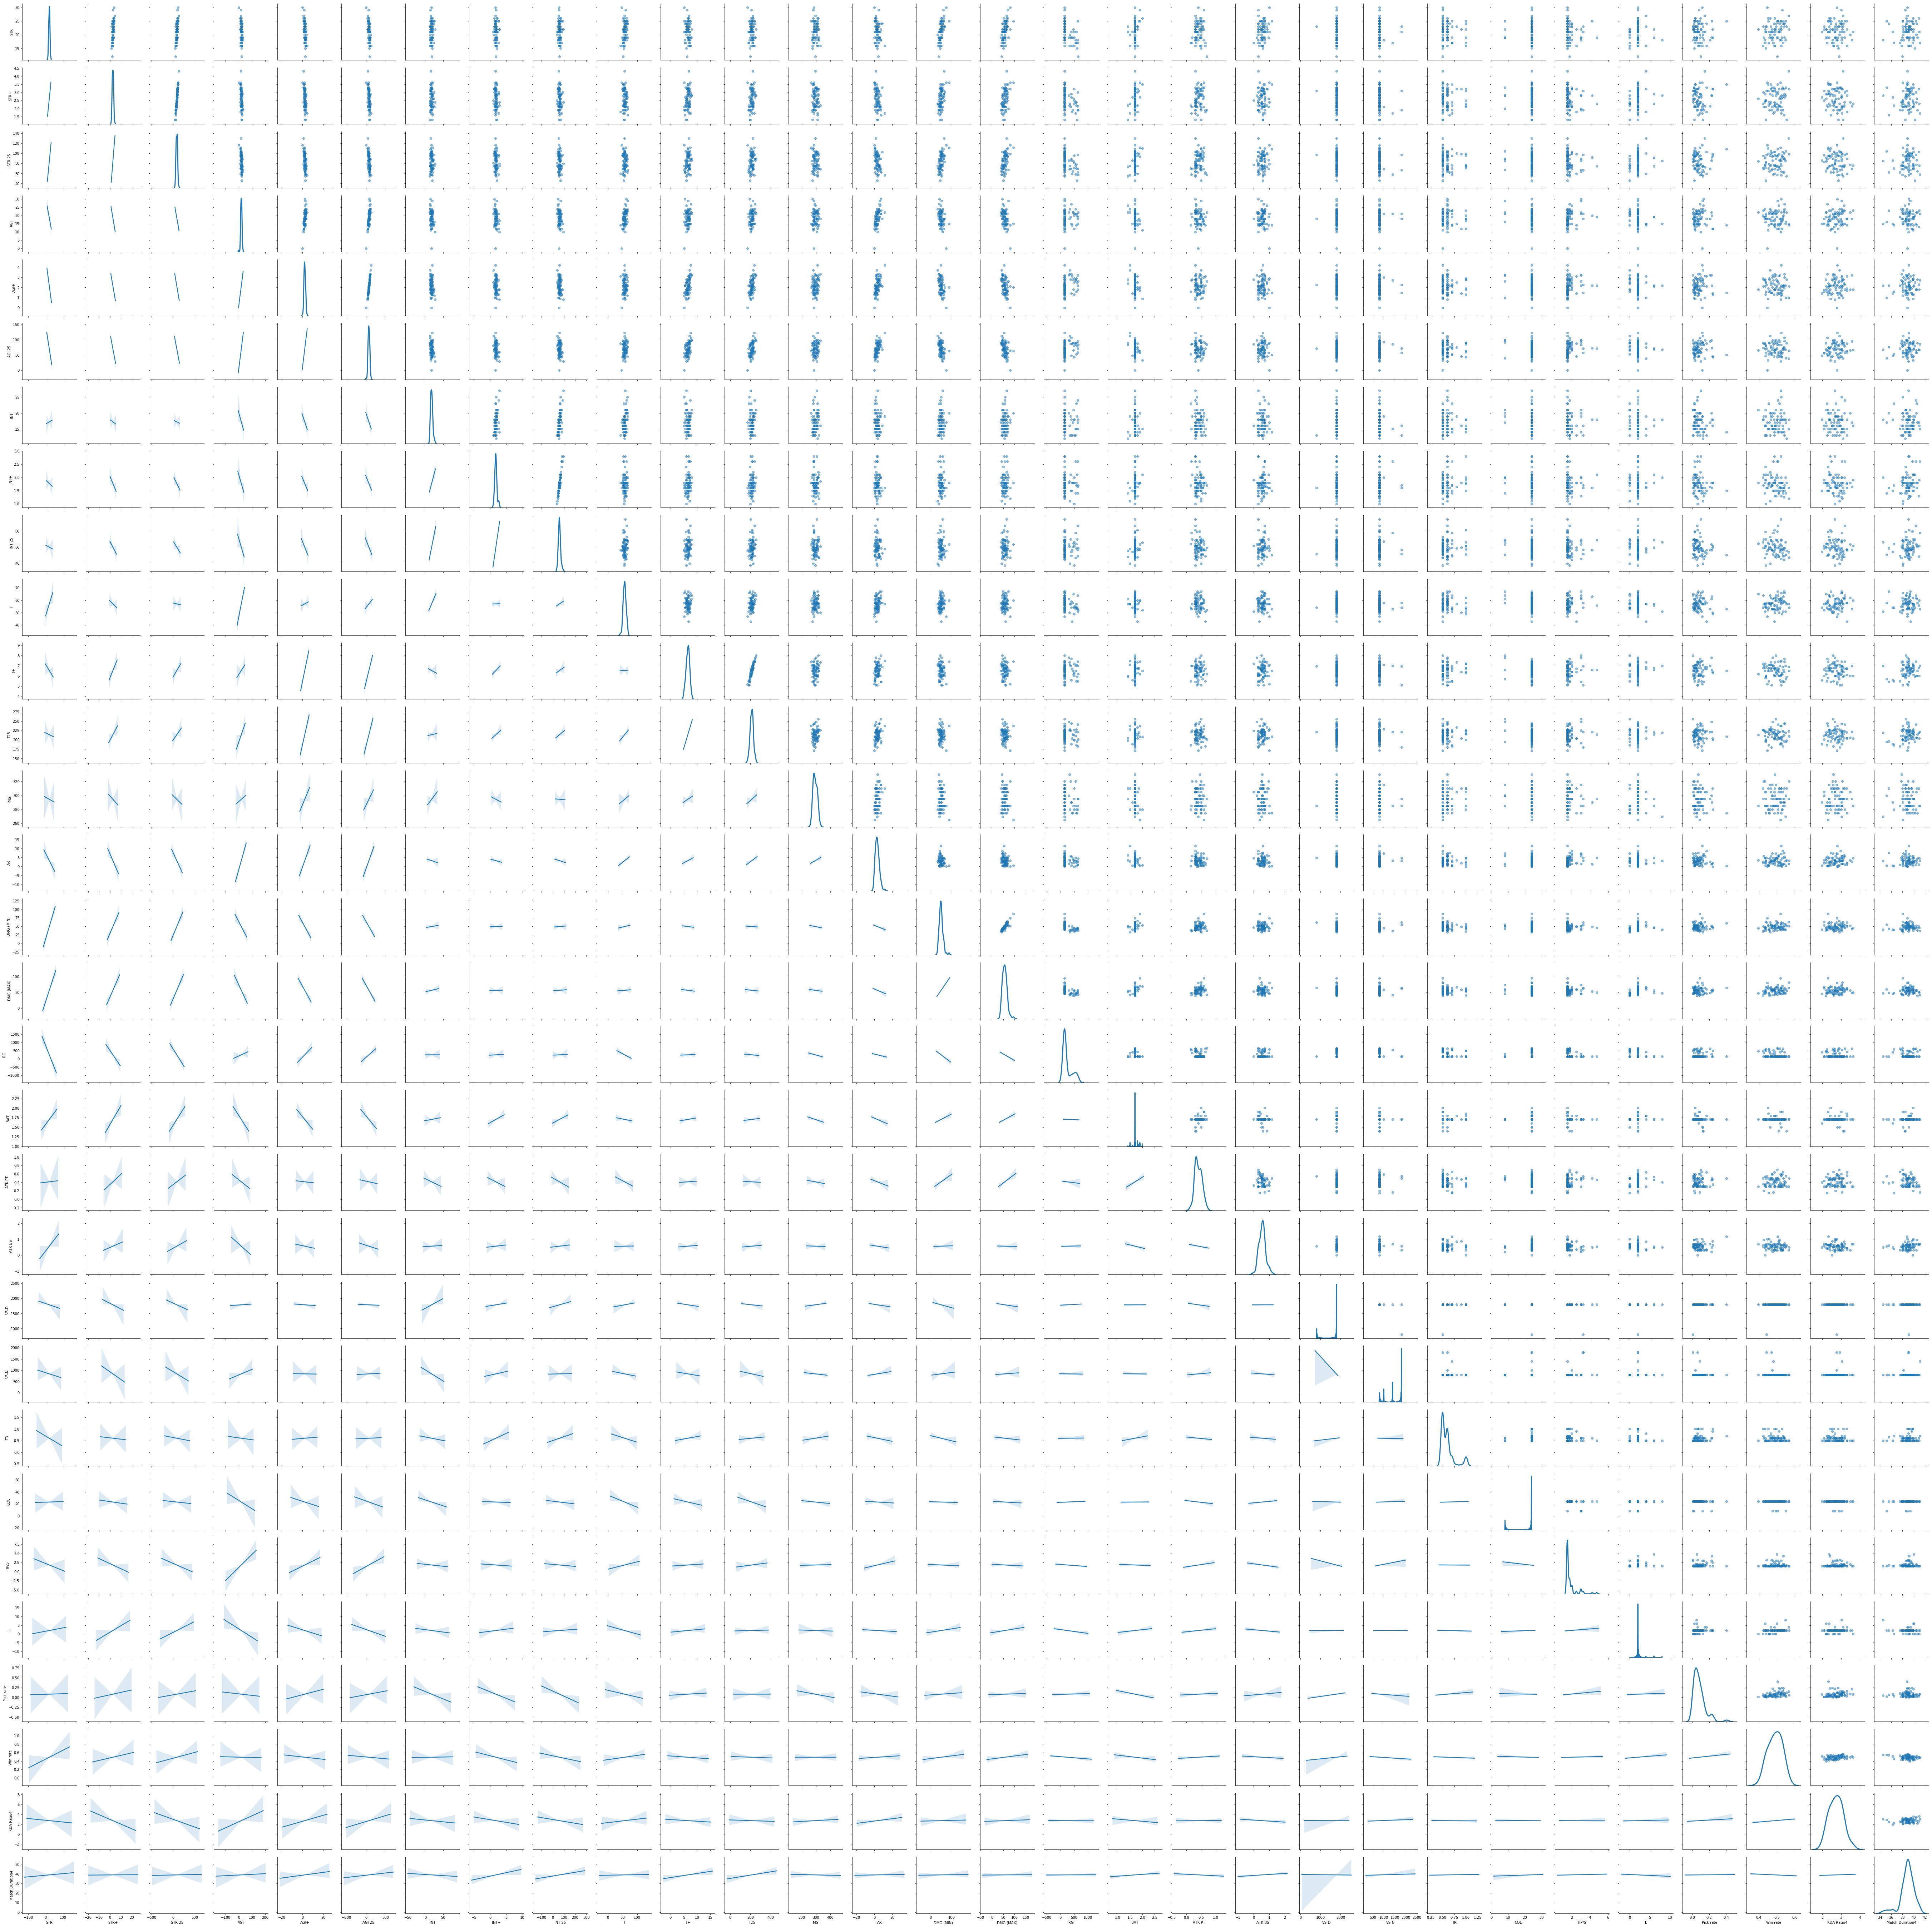

In [9]:
g = sns.PairGrid(df_compare, diag_sharey=False)
g.map_upper(plt.scatter, alpha=.5)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(sns.kdeplot, lw=3)
plt.show()

                      STR      STR+    STR 25       AGI      AGI+    AGI 25  \
STR              1.000000  0.600992  0.723041 -0.418373 -0.579265 -0.580872   
STR+             0.600992  1.000000  0.986671 -0.509380 -0.504436 -0.537913   
STR 25           0.723041  0.986671  1.000000 -0.525442 -0.553926 -0.583188   
AGI             -0.418373 -0.509380 -0.525442  1.000000  0.644612  0.764589   
AGI+            -0.579265 -0.504436 -0.553926  0.644612  1.000000  0.985604   
AGI 25          -0.580872 -0.537913 -0.583188  0.764589  0.985604  1.000000   
INT              0.035685 -0.050692 -0.036548 -0.234164 -0.241261 -0.255180   
INT+            -0.057730 -0.166144 -0.155354 -0.223488 -0.194128 -0.213084   
INT 25          -0.038092 -0.154473 -0.141268 -0.256315 -0.233711 -0.253713   
T                0.314184 -0.106721 -0.028274  0.533096  0.071123  0.177855   
T+              -0.145481  0.248904  0.185511  0.148344  0.579429  0.521292   
T25             -0.045577  0.206632  0.169315  0.301

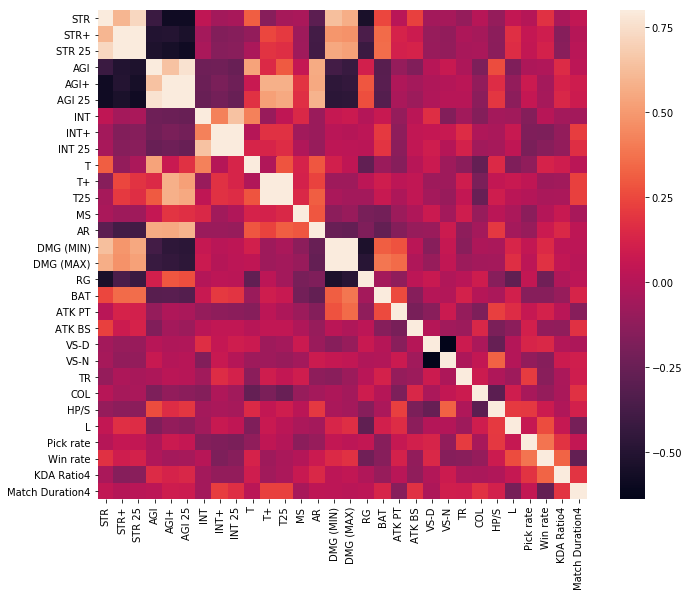

In [10]:
corrmat = df_compare.corr()
print(corrmat)


f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

Looking at the heat map above let's create a short list of the variables that are both highly correlated to one another and do not correlate well to winrate.



1.   STR, STR+, STR 25
2.   AGI, AGI+, AGI 25
3.   INT, INT+, INT 25
4.   T+, T25
5.   DMG(min), DMG(max)

We'll combine the columns in each list item simply by applying the same logic in the feature engineering section of the Thinkful curriculum.




Notes for more work, from here pair down columns that are or have high correlations, Keep following the feature engineering page.

Next follow the PCA outline to pair down columns even further

In [0]:
#Thinkful way

# Str first

#Obviously I could turn this into a function but i'm short on time so i'm just donig the quick and dirty method
means = df_compare[['STR','STR+','STR 25']].mean(axis=0)
stds = df_compare[['STR','STR+','STR 25']].std(axis=0)
df_compare['STR_C'] = ((df_compare[['STR','STR+','STR 25']] - means) / stds).mean(axis=1)

means = df_compare[['AGI','AGI+','AGI 25']].mean(axis=0)
stds = df_compare[['AGI','AGI+','AGI 25']].std(axis=0)
df_compare['AGI_C'] = ((df_compare[['AGI','AGI+','AGI 25']] - means) / stds).mean(axis=1)

means = df_compare[['INT','INT+','INT 25']].mean(axis=0)
stds = df_compare[['INT','INT+','INT 25']].std(axis=0)
df_compare['INT_C'] = ((df_compare[['INT','INT+','INT 25']] - means) / stds).mean(axis=1)

means = df_compare[['T+','T25']].mean(axis=0)
stds = df_compare[['T+','T25']].std(axis=0)
df_compare['STATS_C'] = ((df_compare[['T+','T25']] - means) / stds).mean(axis=1)

means = df_compare[['DMG (MIN)','DMG (MAX)']].mean(axis=0)
stds = df_compare[['DMG (MIN)','DMG (MAX)']].std(axis=0)
df_compare['DMG_C'] = ((df_compare[['DMG (MIN)','DMG (MAX)']] - means) / stds).mean(axis=1)


df_compare=df_compare.drop(['STR','STR+','STR 25','AGI','AGI+','AGI 25','INT','INT+','INT 25','T+','T25','DMG (MIN)','DMG (MAX)'],axis=1)

df_compare


In [56]:

plotdf = df.loc[:, ['STR','STR+','STR 25']]
plotdf['STR_C'] = df_compare['STR_C']
corrmat2 = plotdf.corr()


print(corrmat2)

             STR      STR+    STR 25     STR_C
STR     1.000000  0.553653  0.690304  0.841831
STR+    0.553653  1.000000  0.984698  0.937325
STR 25  0.690304  0.984698  1.000000  0.981534
STR_C   0.841831  0.937325  0.981534  1.000000


In [0]:
#Before we get into PCA we have to combine our feature and create a new feature out of winrate.

#Essentially Let's separate all the heroes that have > 60% winrate





In [0]:
df_compare

In [0]:
# PCA attempt


from sklearn.preprocessing import StandardScaler

#Seperate the features out
features = df_compare.columns

x = df_compare.loc[:, features].values

#Standardize the data
x = StandardScaler().fit_transform(x)

In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])




In [0]:
# This is wrong as we don't want to compare each hero we want to compare groups

finalDF = pd.concat([principalDf, df[['HERO']]], axis = 1)


In [62]:
finalDF

,principal component 1,principal component 2,HERO
0,1.464548,-0.674832,Abaddon
1,1.087187,0.233541,Alchemist
2,-2.092727,-0.909311,Ancient Apparition
3,0.097661,1.338431,Anti-Mage
4,0.366381,-2.277478,Arc Warden
5,1.240327,1.125214,Axe
6,-0.429099,-1.729197,Bane
7,-1.613622,-1.357355,Batrider
8,0.620840,-0.703063,Beastmaster
9,0.516740,1.469409,Bloodseeker
